### IMAGE CLASSIFICATION USING SVM

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
im=cv2.imread('goku.jpg')               #reads inn bgr format     
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)   #coverts bgr to rgb
original_shape=im.shape
print(im.shape)

(1385, 1628, 3)


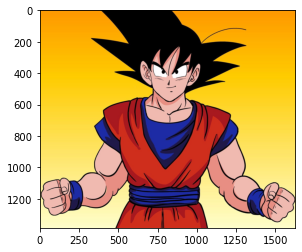

In [3]:
plt.imshow(im)                             #shows as RGBB Format
plt.show()

In [14]:
# Flatten each channel of the image
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(2254780, 3)


In [17]:
from sklearn.cluster import KMeans
dominant_colors = 4 
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [18]:
centers = km.cluster_centers_
centers = np.array(centers, dtype = 'uint8')
print(centers)

[[254 193  18]
 [ 14  12  38]
 [245 209 153]
 [187  40  31]]


### Plot what all colors are these

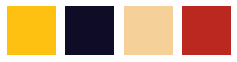

In [21]:
i=1
plt.figure(0, figsize=(4,2))

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    #color swatch
    a=np.zeros((100,100,3), dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()

### Segmenting our original image

In [32]:
new_img=np.zeros((1385*1628,3),dtype='uint8')
print(new_img.shape)

(2254780, 3)


In [33]:
colors

[array([254, 193,  18], dtype=uint8),
 array([14, 12, 38], dtype=uint8),
 array([245, 209, 153], dtype=uint8),
 array([187,  40,  31], dtype=uint8)]

In [34]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

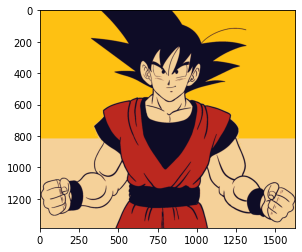

In [35]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img= new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()